<a href="https://colab.research.google.com/github/Aashutosh-Basnet/KaggleCompetitions/blob/main/KaggleHousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.shape

(545, 13)

In [ ]:
df['furnishingstatus'].nunique()

3

In [ ]:
unique_values = df['furnishingstatus'].unique
print(unique_values)

<bound method Series.unique of 0           furnished
1           furnished
2      semi-furnished
3           furnished
4           furnished
            ...      
540       unfurnished
541    semi-furnished
542       unfurnished
543         furnished
544       unfurnished
Name: furnishingstatus, Length: 545, dtype: object>


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encoding =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df[columns_to_encoding] = df[columns_to_encoding].apply(label_encoder.fit_transform)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df['furnishingstatus'] = df['furnishingstatus'].astype(str)

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories = [['unfurnished', 'semi-furnished', 'furnished']])

df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])

df['furnishingstatus'].head()

,furnishingstatus
0,2.0
1,2.0
2,1.0
3,2.0
4,2.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,2.0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,2.0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1.0
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,2.0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,2.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

<Axes: ylabel='Count'>

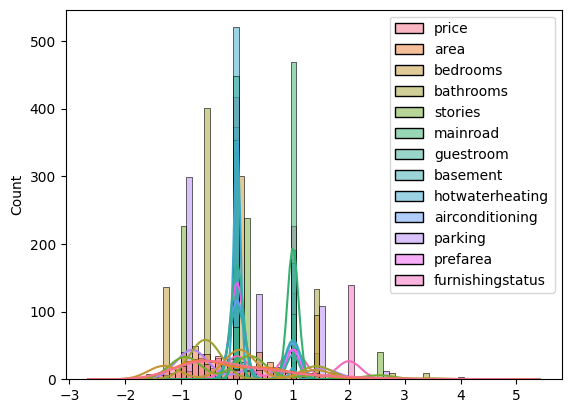

In [ ]:
sns.histplot(df, kde=True)

In [ ]:
from scipy import stats

z_threshold = 3

df_cleaned = df[(np.abs(stats.zscore(df)) < z_threshold).all(axis=1)]

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,0.391790,0.047278,1.421812,2.532024,1,0,0,0,1,0.355976,0,2.0
93,0.945257,0.047278,1.421812,-0.929397,1,0,1,0,1,2.679409,0,1.0
335,-0.615521,-1.308863,-0.570187,-0.929397,1,0,1,0,1,1.517692,0,2.0
412,-1.171756,0.047278,-0.570187,0.224410,1,0,1,0,0,-0.805741,1,0.0
471,-0.645962,0.047278,-0.570187,0.224410,1,0,0,0,0,-0.805741,0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root mean squared error: ", rmse)
print("R-squared:", r2)


Mean Squared Error: 0.5073561548750557
Root mean squared error:  0.7122893757982466
R-squared: 0.6494754192267795


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
